## Imports

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv("housing.csv")

## Data Exploration

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

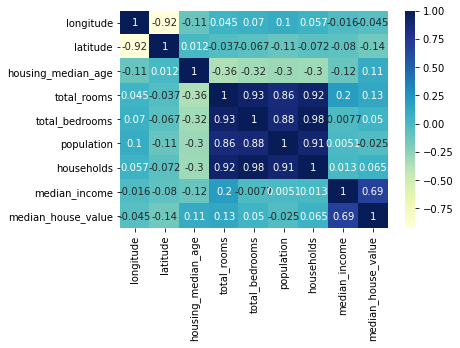

In [15]:
sns.heatmap(data.corr(), annot=True, cmap= "YlGnBu")

In [9]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
data.info()
# here I see that total_bedrooms is missing some entries so I am going to drop the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

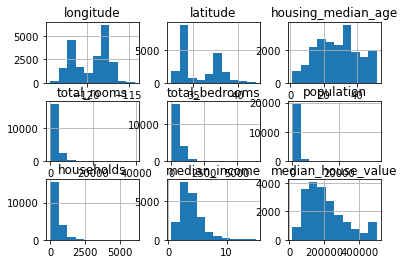

In [14]:
data.hist()

## Data Cleaning/Manipulation

In [11]:
data.dropna(inplace=True)

## Linear Regression- Prelim Model

In [88]:
X= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']
#defining x and y for test train split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [90]:
train_data= X_train.join(y_train)

In [91]:
train_data['population'] = np.log(train_data['population']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['households'] = np.log(train_data['households']+1)

In [92]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


<AxesSubplot:>

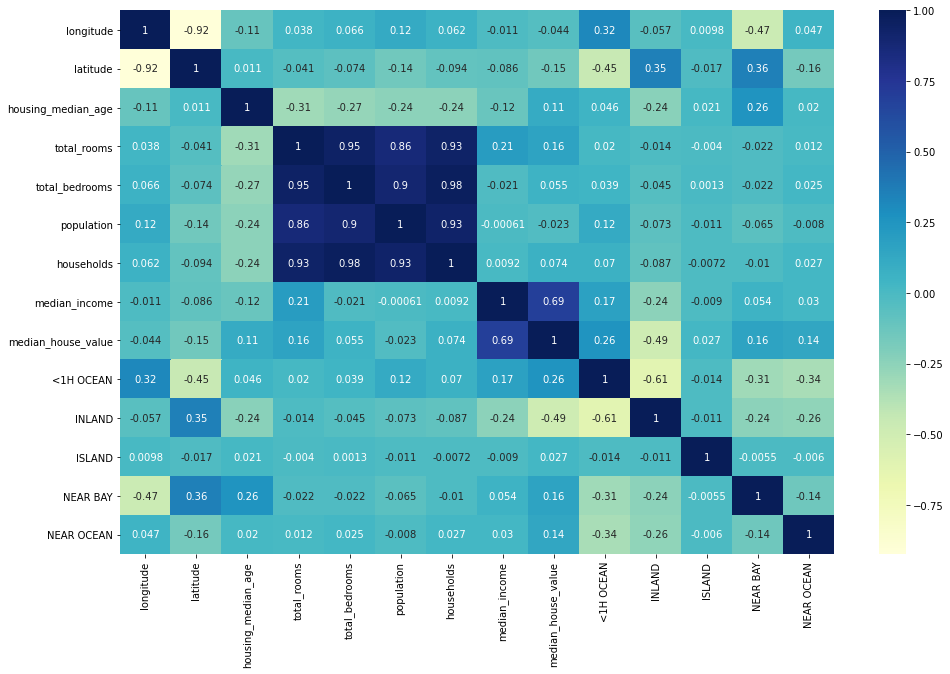

In [93]:
plt.figure(figsize=(16,10))
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu")

In [94]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [95]:
test_data= X_test.join(y_test)


                                                                        

In [96]:
test_data['population'] = np.log(test_data['population']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['households'] = np.log(test_data['households']+1)

In [98]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [99]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [100]:
reg.score(X_test, y_test)

0.6513410632518772

In [101]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3421,-118.42,34.28,34.0,7.600902,6.059123,7.779885,6.086775,2.8000,144300.0,1,0,0,0,0
2758,-115.49,32.67,29.0,7.329094,6.089045,7.172425,5.976351,1.1311,84700.0,0,1,0,0,0
1261,-121.72,38.00,7.0,8.981933,7.181592,8.403128,7.165493,4.9618,156500.0,0,1,0,0,0
1832,-122.31,37.91,31.0,7.267525,5.855072,6.525030,5.855072,2.7243,218100.0,0,0,0,1,0
11912,-117.44,33.96,29.0,4.828314,3.135494,3.931826,2.944439,12.5381,112500.0,0,1,0,0,0


In [87]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8755,-118.36,33.81,25.0,9.109746,7.612337,8.402680,7.573017,4.5592,378800.0,1,0,0,0,0
18370,-121.93,37.13,37.0,7.048386,5.318120,6.238325,5.192957,5.7415,398500.0,1,0,0,0,0
1957,-120.78,38.73,31.0,8.044947,6.424869,7.382124,6.378426,2.9844,127900.0,0,1,0,0,0
15534,-117.11,33.14,10.0,8.073715,6.456770,7.241366,6.368187,3.4455,190500.0,1,0,0,0,0
3237,-119.56,36.10,29.0,6.052089,4.369448,5.652489,4.304065,1.5313,43800.0,0,1,0,0,0
